In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

In [2]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
servicekey = 'QmnwzKg91T496WKWEYKjgb%2BHQChmcpkc7%2BDY46Q45S3wwbpYjuyIT5mlyv6h4nk5EPbZLDqniiR0KW1JAOUdxw%3D%3D'
decodekey = unquote(servicekey)

In [3]:
startCreateDt = 20200120
endCreateDt = 20220929

query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params

In [4]:
request = Request(URL)
page = urlopen(request).read()

In [5]:
soup = BeautifulSoup(page, 'html.parser')
parse = soup.find_all(['deathcnt', 'statedt'])  

df_1 = []
for dt, cnt in zip(parse[1::2], parse[0::2]):
    df_1.append([dt.text, int(cnt.text)])  

df_1 = pd.DataFrame(df_1, columns=['날짜', '누적사망자'])
df_1 = df_1.sort_values(by='날짜').reset_index(drop=True) 
df_1['일별사망자'] = df_1['누적사망자'].diff()
df_1 = df_1.loc[1:].reset_index(drop=True)  
df_1['일별사망자'] = df_1['일별사망자'].astype(int)
df_1

,날짜,누적사망자,일별사망자
0,20200121,0,0
1,20200122,0,0
2,20200123,0,0
3,20200124,0,0
4,20200125,0,0
...,...,...,...
975,20220924,28140,63
976,20220925,28213,73
977,20220926,28246,33
978,20220927,28272,26


In [6]:
soup = BeautifulSoup(page, 'html.parser')
parse = soup.find_all(['decidecnt', 'statedt'])  

df = []
for dt, cnt in zip(parse[1::2], parse[0::2]):
    df.append([dt.text, int(cnt.text)])  

df = pd.DataFrame(df, columns=['날짜', '누적확진자'])
df = df.sort_values(by='날짜').reset_index(drop=True) 
df['일별확진자'] = df['누적확진자'].diff()
df = df.loc[1:].reset_index(drop=True)  
df['일별확진자'] = df['일별확진자'].astype(int)
df

,날짜,누적확진자,일별확진자
0,20200121,1,0
1,20200122,1,0
2,20200123,1,0
3,20200124,2,1
4,20200125,2,0
...,...,...,...
975,20220924,24594336,29353
976,20220925,24620128,25792
977,20220926,24634296,14168
978,20220927,24673663,39367


In [7]:
df_InfState = pd.merge(df, df_1)
df_InfState

,날짜,누적확진자,일별확진자,누적사망자,일별사망자
0,20200121,1,0,0,0
1,20200122,1,0,0,0
2,20200123,1,0,0,0
3,20200124,2,1,0,0
4,20200125,2,0,0,0
...,...,...,...,...,...
975,20220924,24594336,29353,28140,63
976,20220925,24620128,25792,28213,73
977,20220926,24634296,14168,28246,33
978,20220927,24673663,39367,28272,26


In [8]:
df_InfState['날짜'] = pd.to_datetime(df_InfState['날짜'])

In [9]:
df_InfState.dtypes

날짜       datetime64[ns]
누적확진자             int64
일별확진자             int32
누적사망자             int64
일별사망자             int32
dtype: object

In [10]:
df_InfState

,날짜,누적확진자,일별확진자,누적사망자,일별사망자
0,2020-01-21,1,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-23,1,0,0,0
3,2020-01-24,2,1,0,0
4,2020-01-25,2,0,0,0
...,...,...,...,...,...
975,2022-09-24,24594336,29353,28140,63
976,2022-09-25,24620128,25792,28213,73
977,2022-09-26,24634296,14168,28246,33
978,2022-09-27,24673663,39367,28272,26


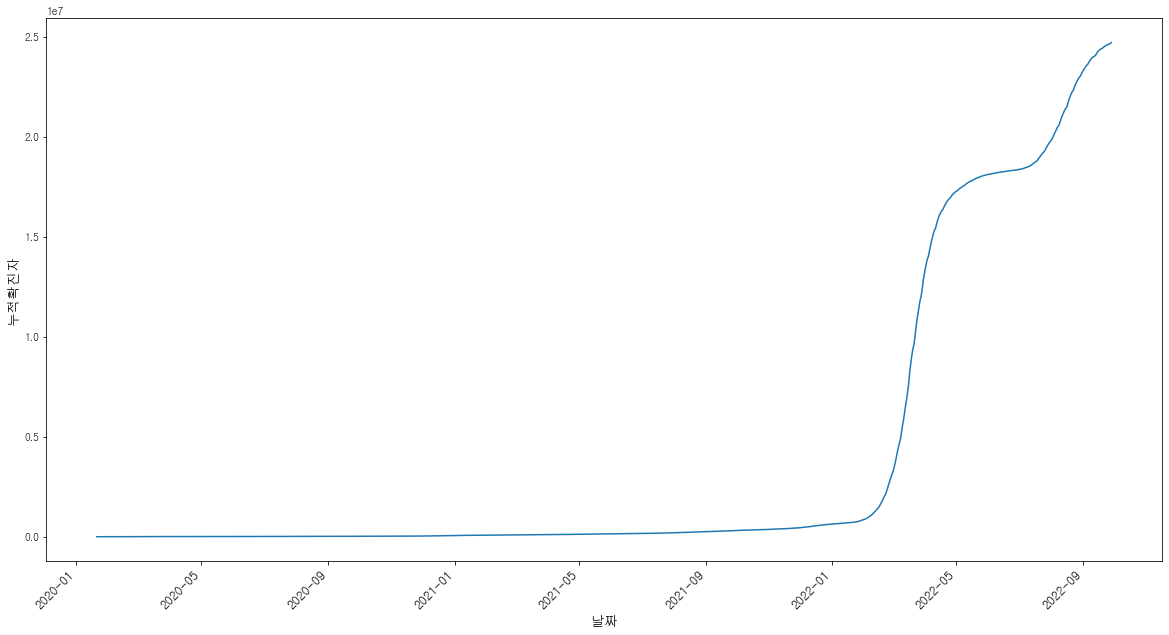

In [11]:
plt.rcParams['font.family'] ='gulim'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='누적확진자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('누적확진자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

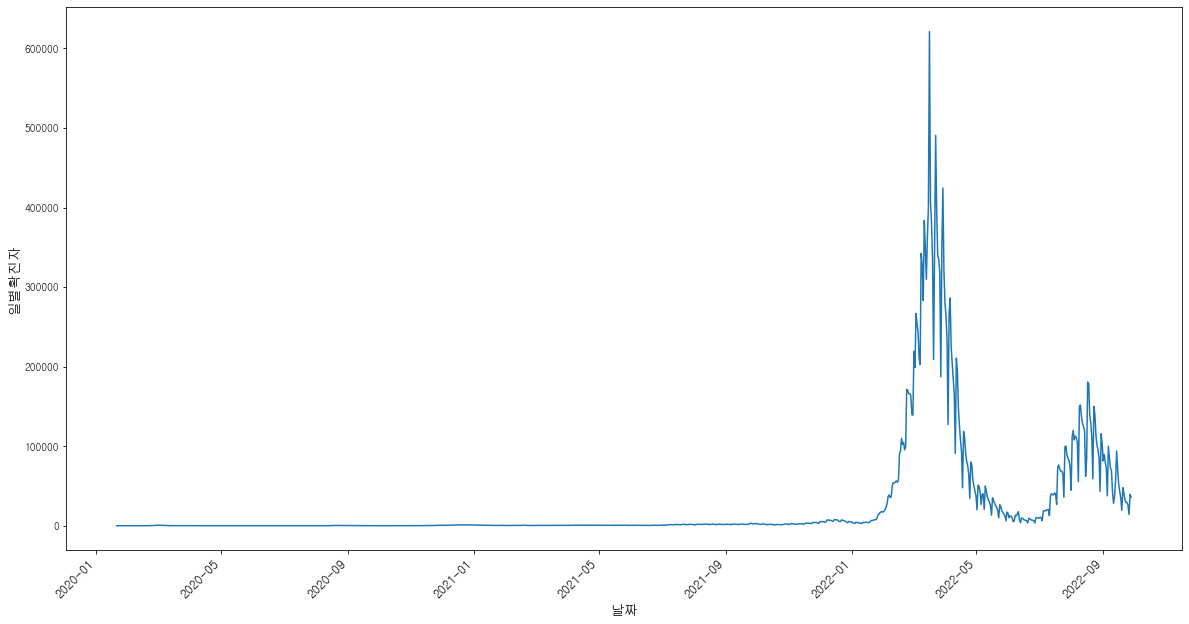

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='일별확진자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('일별확진자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

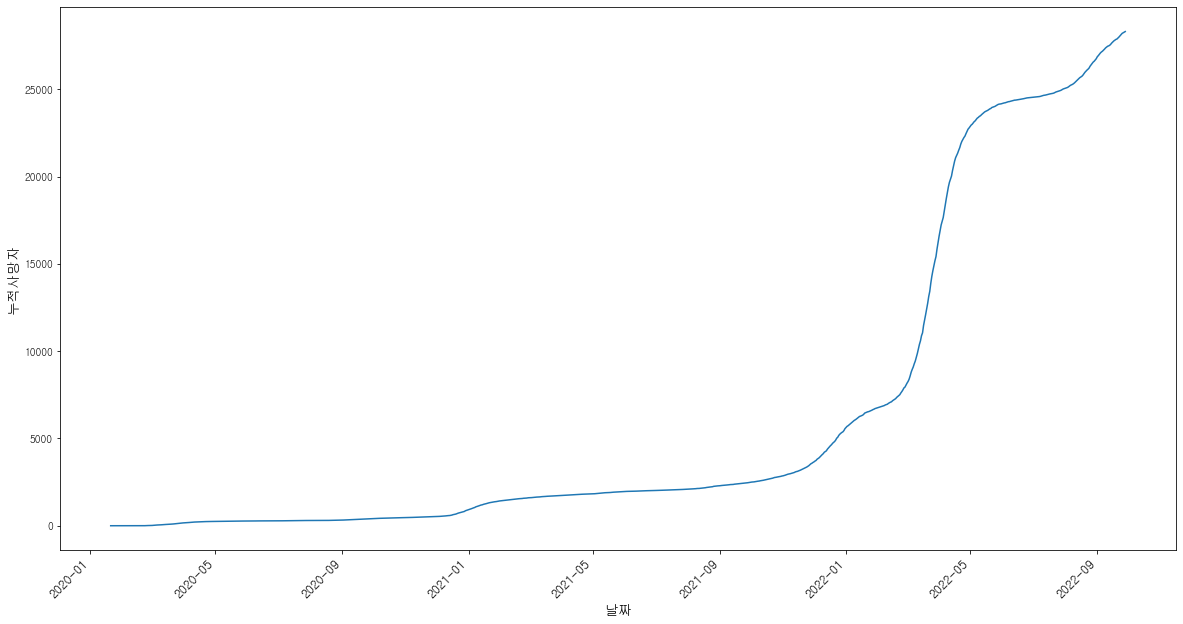

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='누적사망자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('누적사망자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

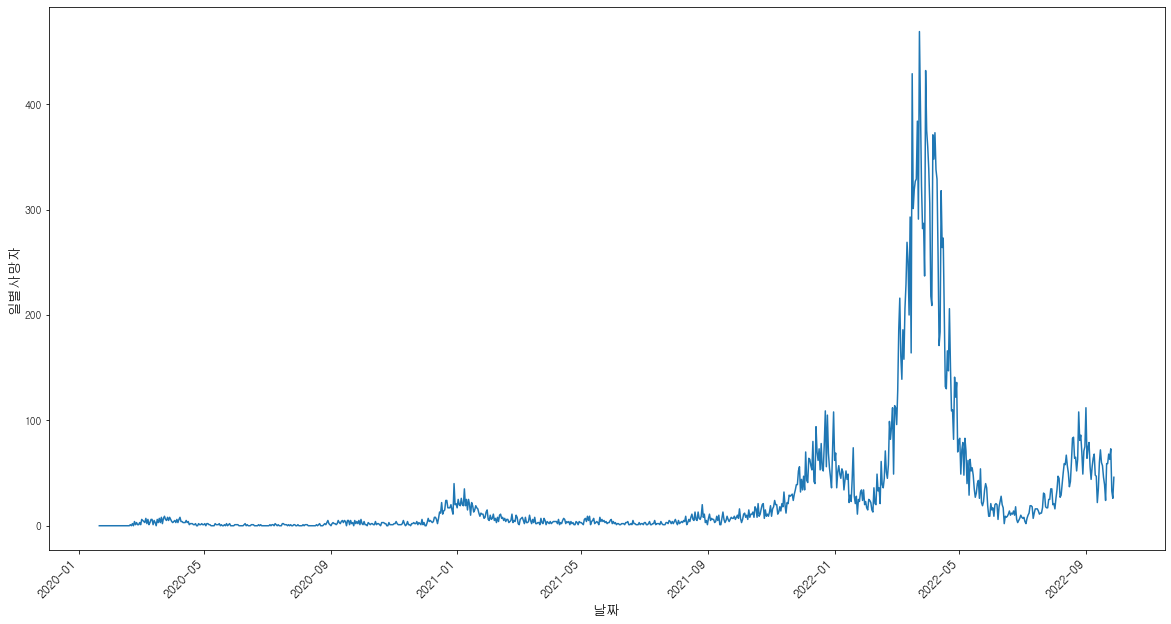

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(x='날짜', y='일별사망자',data=df_InfState)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.ylabel('일별사망자',size=14)
plt.xlabel('날짜',size=14)
plt.show()

In [15]:
df_InfState_long = pd.melt(df_InfState, id_vars=['날짜'], value_vars=['일별확진자', '일별사망자', '누적확진자', '누적사망자']).sort_values('날짜')
df_InfState_long

,날짜,variable,value
0,2020-01-21,일별확진자,0
980,2020-01-21,일별사망자,0
2940,2020-01-21,누적사망자,0
1960,2020-01-21,누적확진자,1
2941,2020-01-22,누적사망자,0
...,...,...,...
978,2022-09-27,일별확진자,39367
1959,2022-09-28,일별사망자,46
979,2022-09-28,일별확진자,36126
2939,2022-09-28,누적확진자,24709789


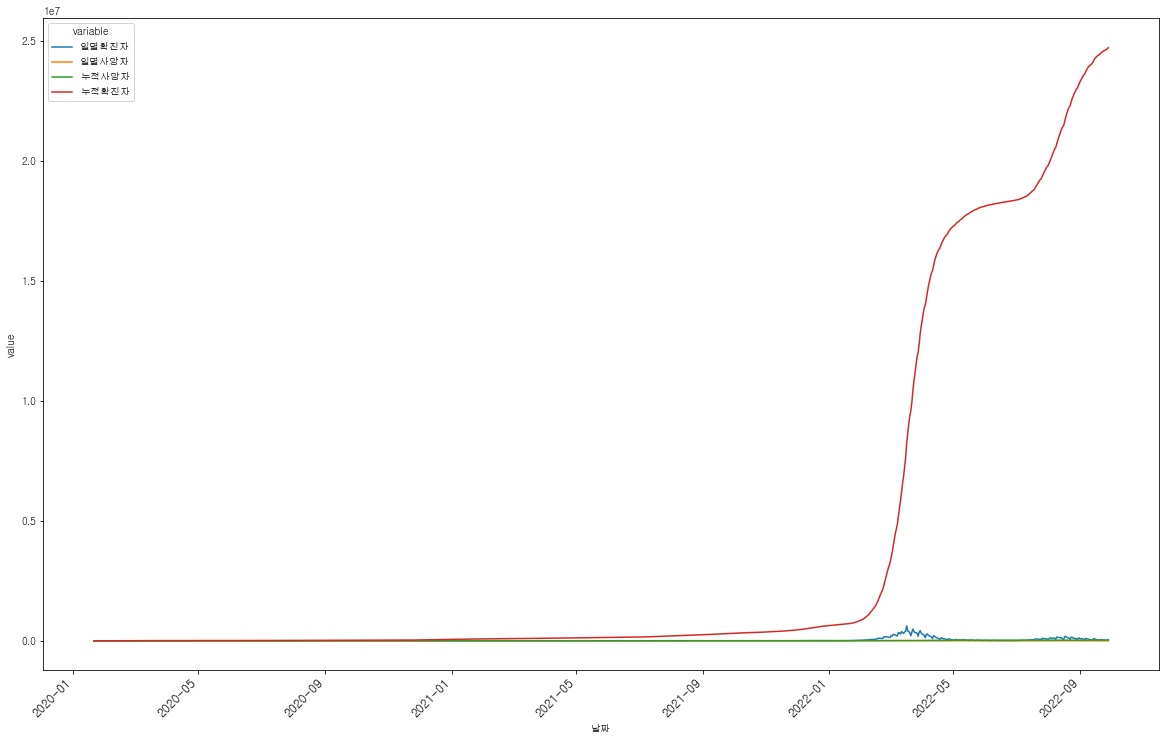

In [16]:
plt.figure(figsize=(20,12))
sns.lineplot('날짜', 'value', hue='variable', data=df_InfState_long)
plt.xticks(size=12,rotation=45, horizontalalignment='right')
plt.show()

In [17]:
df_InfState_long['year'] = df_InfState_long['날짜'].dt.year
df_InfState_long['month'] = df_InfState_long['날짜'].dt.month
df_InfState_long['day'] = df_InfState_long['날짜'].dt.day
df_InfState_long

,날짜,variable,value,year,month,day
0,2020-01-21,일별확진자,0,2020,1,21
980,2020-01-21,일별사망자,0,2020,1,21
2940,2020-01-21,누적사망자,0,2020,1,21
1960,2020-01-21,누적확진자,1,2020,1,21
2941,2020-01-22,누적사망자,0,2020,1,22
...,...,...,...,...,...,...
978,2022-09-27,일별확진자,39367,2022,9,27
1959,2022-09-28,일별사망자,46,2022,9,28
979,2022-09-28,일별확진자,36126,2022,9,28
2939,2022-09-28,누적확진자,24709789,2022,9,28


In [18]:
df_InfState_day_ptt = df_InfState_long[df_InfState_long['variable'] == '일별확진자'] 
df_InfState_day_death = df_InfState_long[df_InfState_long['variable'] == '일별사망자']  

In [19]:
df_InfState_day_ptt2 = df_InfState_day_ptt.groupby(['year','month'])['value'].sum().reset_index()
df_InfState_day_ptt2

,year,month,value
0,2020,1,10
1,2020,2,2920
2,2020,3,6855
3,2020,4,979
4,2020,5,703
5,2020,6,1331
6,2020,7,1506
7,2020,8,5641
8,2020,9,3865
9,2020,10,2700


In [20]:
df_InfState_day_ptt_20_21 = df_InfState_day_ptt2[(df_InfState_day_ptt2['year']==2020) | (df_InfState_day_ptt2['year']==2021)]

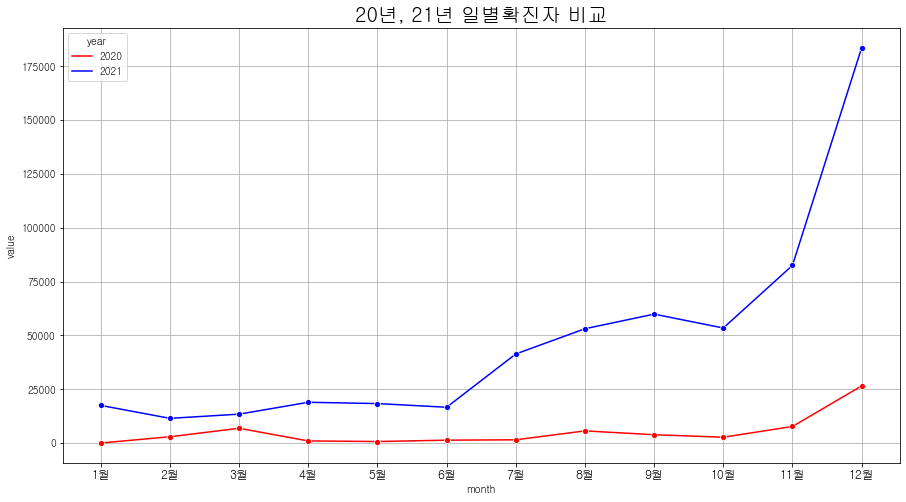

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot('month', 'value', hue='year',data=df_InfState_day_ptt_20_21, marker='o', palette=['red', 'blue'])
plt.title('20년, 21년 일별확진자 비교', fontsize=20)
plt.xticks(np.arange(1,13,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], fontsize=12)
plt.xlabel('month')
plt.grid(True)
plt.show()

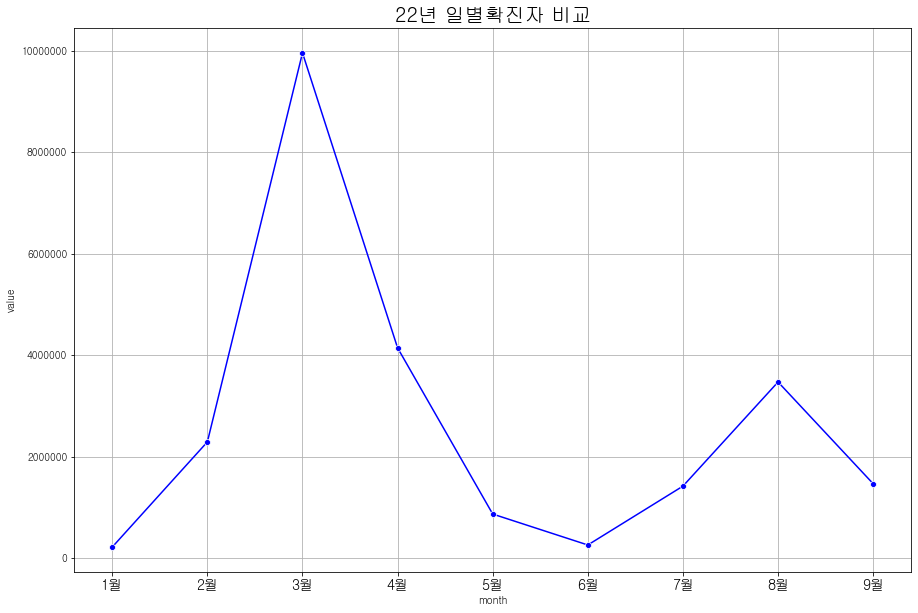

In [22]:
df_InfState_day_ptt_22 = df_InfState_day_ptt2[(df_InfState_day_ptt2['year']==2022)]

plt.figure(figsize=(15,10))
sns.lineplot('month', 'value', data=df_InfState_day_ptt_22, marker='o', color='blue')
plt.title('22년 일별확진자 비교', fontsize=20)
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(1,10,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월'], fontsize=14)
plt.xlabel('month')
plt.grid(True)
plt.show()

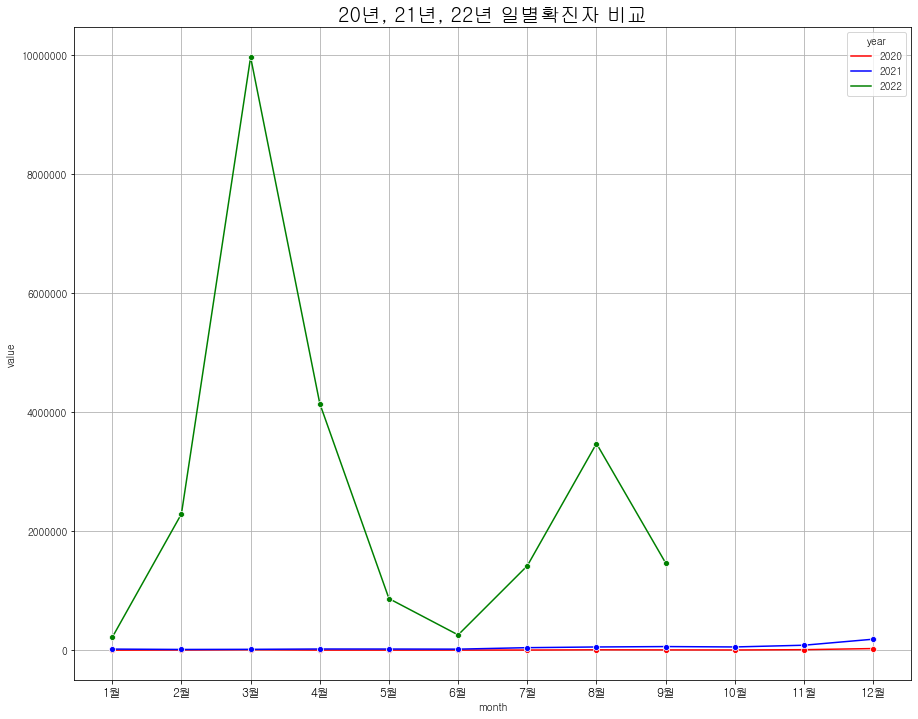

In [23]:
plt.figure(figsize=(15,12))
sns.lineplot('month', 'value', hue='year',data=df_InfState_day_ptt2, marker='o', palette=['red', 'blue', 'green'])
plt.title('20년, 21년, 22년 일별확진자 비교', fontsize=20)
plt.xticks(np.arange(1,13,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], fontsize=12)
plt.xlabel('month')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

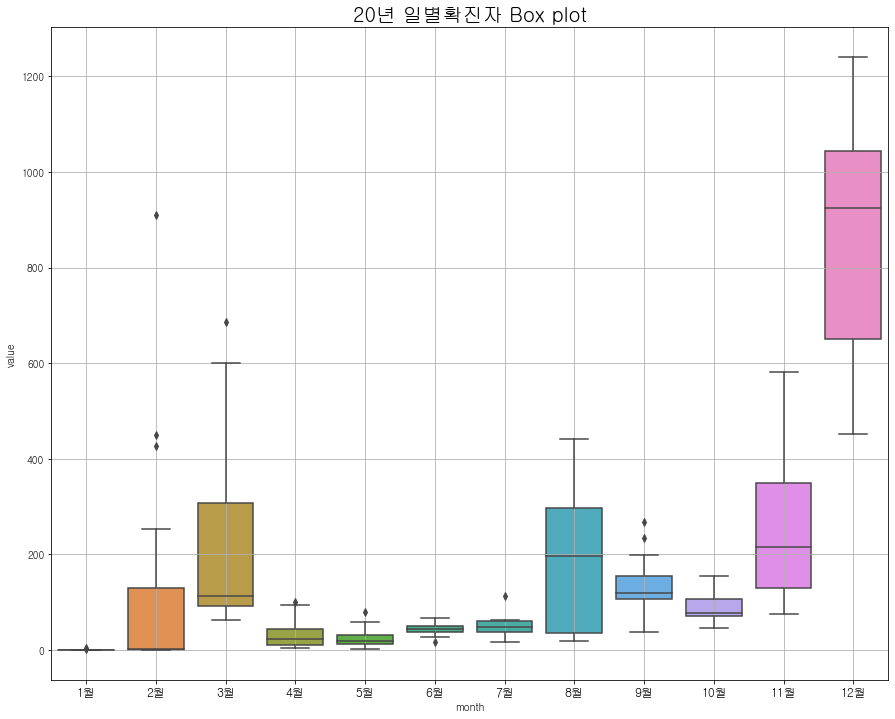

In [24]:
df_InfState_long_20 = df_InfState_long[(df_InfState_long['year']==2020) & (df_InfState_long['variable'] == '일별확진자')]

plt.figure(figsize=(15,12))
sns.boxplot(x='month', y='value', data=df_InfState_long_20)
plt.title('20년 일별확진자 Box plot', fontsize=20)
plt.xticks(np.arange(0,12,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], fontsize=12)
plt.xlabel('month')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

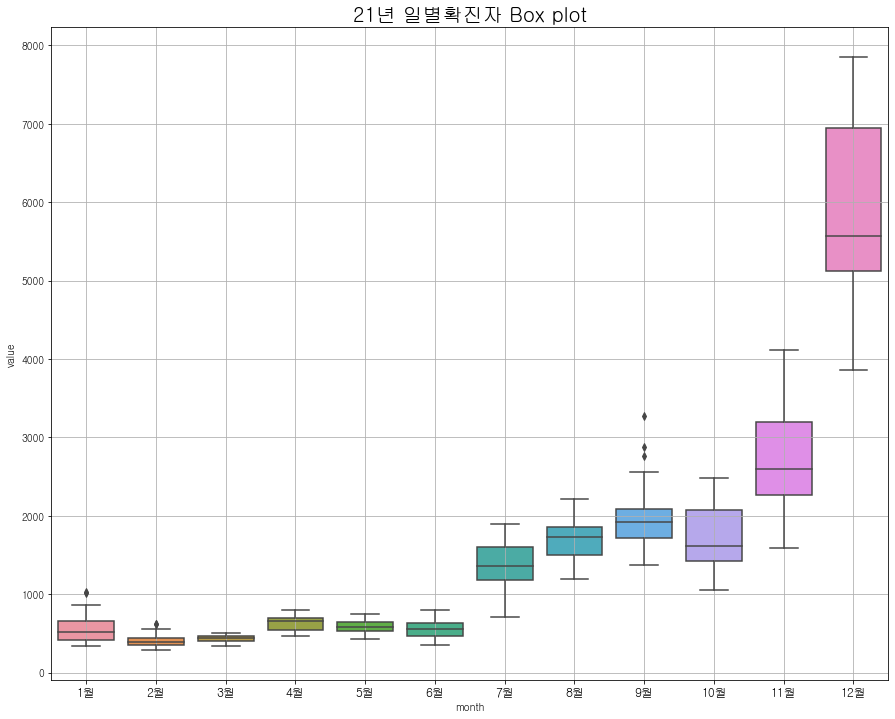

In [25]:
df_InfState_long_21 = df_InfState_long[(df_InfState_long['year']==2021) & (df_InfState_long['variable'] == '일별확진자')]

plt.figure(figsize=(15,12))
sns.boxplot(x='month', y='value', data=df_InfState_long_21)
plt.title('21년 일별확진자 Box plot', fontsize=20)
plt.xticks(np.arange(0,12,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], fontsize=12)
plt.xlabel('month')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

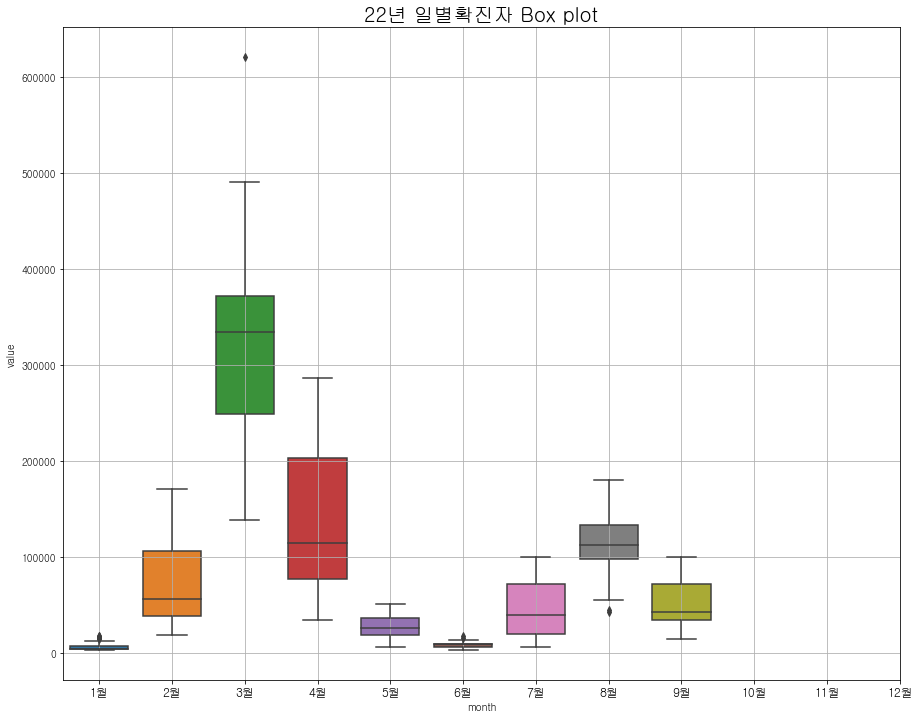

In [26]:
df_InfState_long_22 = df_InfState_long[(df_InfState_long['year']==2022) & (df_InfState_long['variable'] == '일별확진자')]

plt.figure(figsize=(15,12))
sns.boxplot(x='month', y='value', data=df_InfState_long_22)
plt.title('22년 일별확진자 Box plot', fontsize=20)
plt.xticks(np.arange(0,12,1), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], fontsize=12)
plt.xlabel('month')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()